# Homework 04 - Graph Spectra
Date = 04/12/2023  
Authors: Hamnza Ali, Mattia Evangelisti

## Methodology and solution
The primary objective of the assignment is the implementation of the algorithms from the paper ["On Spectral Clustering: Analysis and an algorithm"](https://ai.stanford.edu/~ang/papers/nips01-spectral.pdf) by Andrew Y. Ng, Michael I. Jordan, Yair Weiss. Specifically, the team has developed the presented algorithm and implemented automated selection of the number of clusters through the analysis of the eigengap.  

The code needed for the implementation can be found in the /src folder. The team chose Python to implement the algorithms, using the following libraries:
* networkx: to create and visualize the graph structure
* numpy: to perform matrix operations
* scipy: to perform eigenvalue decomposition
* matplotlib: to visualize the results
* sklearn: to perform the k-means clustering

# How to Run

1. Unzip the folder containing the homework.
2. Check to have Python3 installed on your machine.
3. Check that all the libraries listed in requirements.txt are installed or, in the root directory, run pip install -r requirements.txt to install the required libraries.
4. Move into the src folder and run graph_spectra.ipynb (press "run all").
5. If needed change the parameters in the notebook following the comments.

## Results
Firstly, we set up the experiments by importing the required libraries.

### Import libraries

In [1]:
import networkx as nx
import numpy as np
from matplotlib import pyplot as plt
from spectralClustering import SpectralClustering, load_graph

In [2]:
path_real  = "../data/example1.dat"
path_syntetic = "../data/example2.dat"

## Graph 1 (real graph)

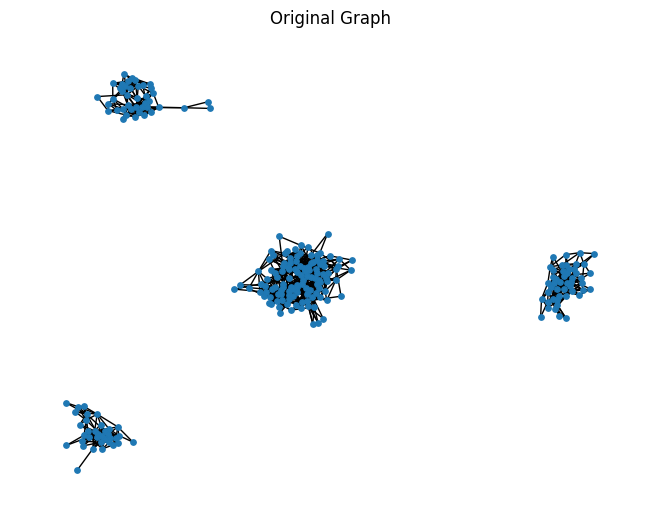

In [3]:
G = load_graph(path_real)
nx.draw(G, node_size=15)
plt.title('Original Graph')
plt.show()

By visual inspection we can guess that the first graph is composed of approximately four clusters.  
We apply the spectral graph clustering algorithm and confirm that it has identified four clusters.

In [4]:
spectralClustering = SpectralClustering(G=G)
classes, fiedler, adjacency_matrix = spectralClustering.compute_clusters()

The optimal number of clusters is 4.


### Sorted Fielder Vector
We plot the sorted Fiedler vector, that is, the eigenvector of the second smallest eigenvalue of the graph's adjacency matrix. By visual inspection, we can clearly see that the eigenvector has three distinct set of values: the extremes and the middle point at zero. Additionally, there is probably a cluster in one of the transitions, summing up to four clusters.


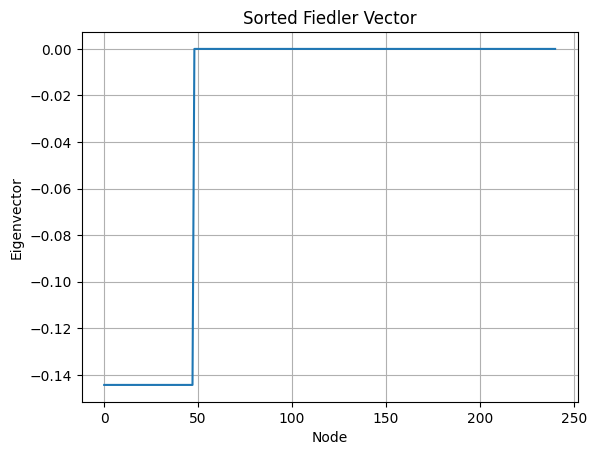

In [5]:
plt.plot(np.sort(fiedler))
plt.xlabel("Node")
plt.ylabel("Eigenvector")
plt.title('Sorted Fiedler Vector')
plt.grid()
plt.show()

### Sparsity Pattern
When plottint the adjacency matrix, we can see that the graph is composed of four clusters. The adjacency matrix is sparse, meaning that there are few edges connecting the nodes of different clusters.

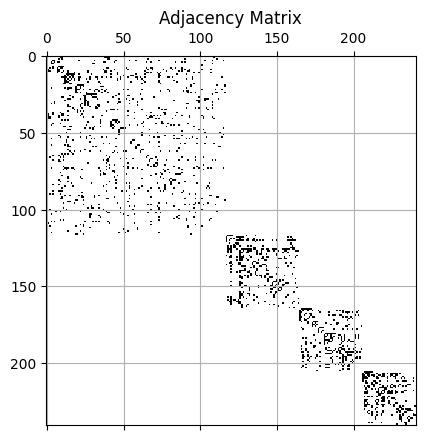

In [6]:
plt.spy(adjacency_matrix);
plt.title('Adjacency Matrix')
plt.grid()
plt.show()

### Clustered Graph
Finally, we plot the graph with the colors representing the class given by the spectral graph clustering algorithm and we can see that they correspond to four different connected components.

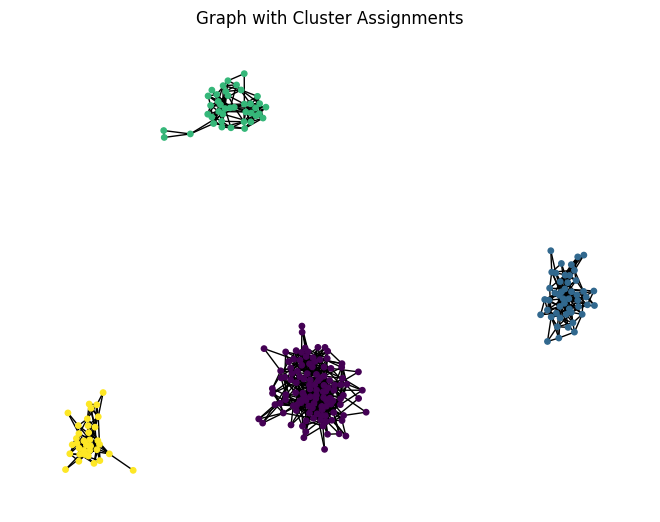

In [7]:
nx.draw(G, node_size=15, node_color=classes)
plt.title('Graph with Cluster Assignments')
plt.show()

## Graph 2 (synthetic graph)

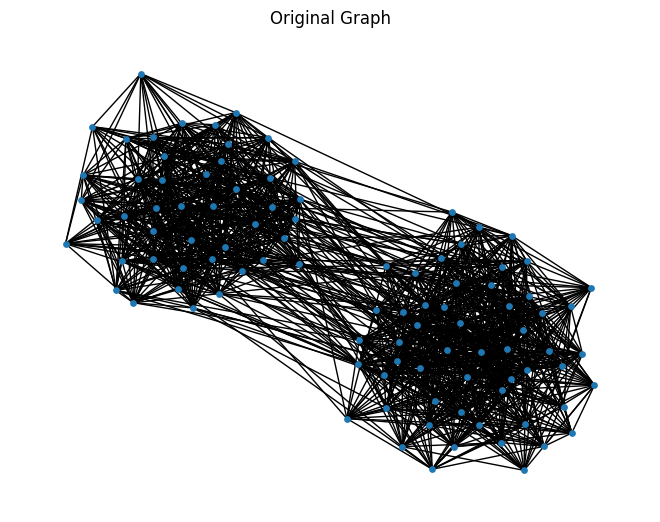

In [8]:
G = load_graph(path_syntetic, weight=True)
nx.draw(G, node_size=15)
plt.title('Original Graph')
plt.show()

We plot the second graph and we observe that it contains at least two clusters that are not separate connected components.  
We apply the spectral graph clustering algorithm and confirm that it has identified two clusters.

In [9]:
spectralClustering = SpectralClustering(G=G)
classes, fiedler, adjacency_matrix = spectralClustering.compute_clusters()

The optimal number of clusters is 2.


### Sorted Fielder Vector
The plot of the Fiedler Vector makes clear the existence of two clusters with a slow transition, which can be an indication that the clusters are connected and not separate components as in the first graph.

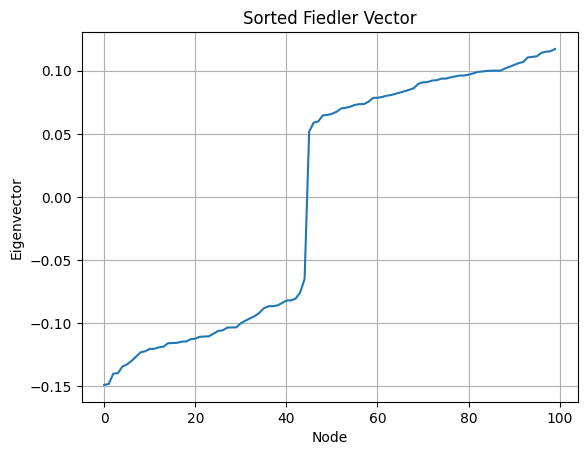

In [10]:
plt.plot(np.sort(fiedler))
plt.xlabel("Node")
plt.ylabel("Eigenvector")
plt.title('Sorted Fiedler Vector')
plt.grid()
plt.show()

### Sparsity Pattern
The sparsity pattern shows how even separate clusters are connected and the clustering task is more complex than in the first graph.

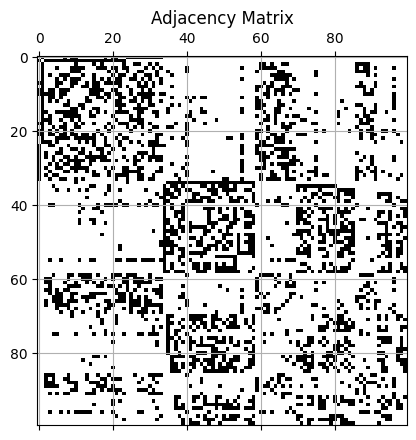

In [11]:
plt.spy(adjacency_matrix);
plt.title('Adjacency Matrix')
plt.grid()
plt.show()

### Clustered Graph
Finally, we plot the graph with the colors representing the class given by the spectral graph clustering algorithm and we can see that they correspond to two clearly separated clusters.

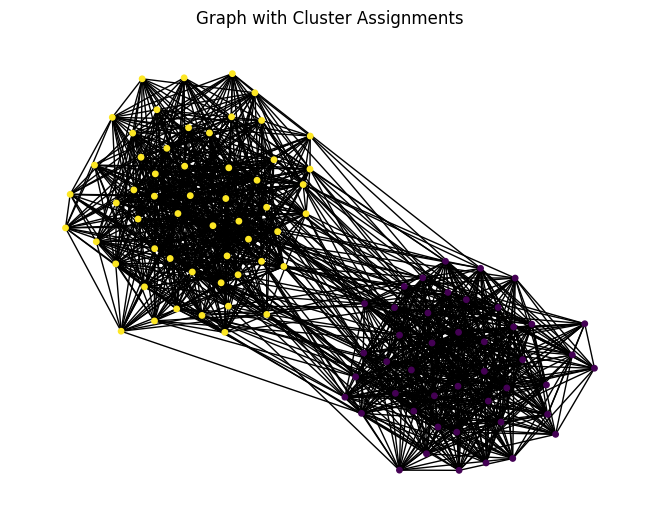

In [12]:
nx.draw(G, node_size=15, node_color=classes)
plt.title('Graph with Cluster Assignments')
plt.show()